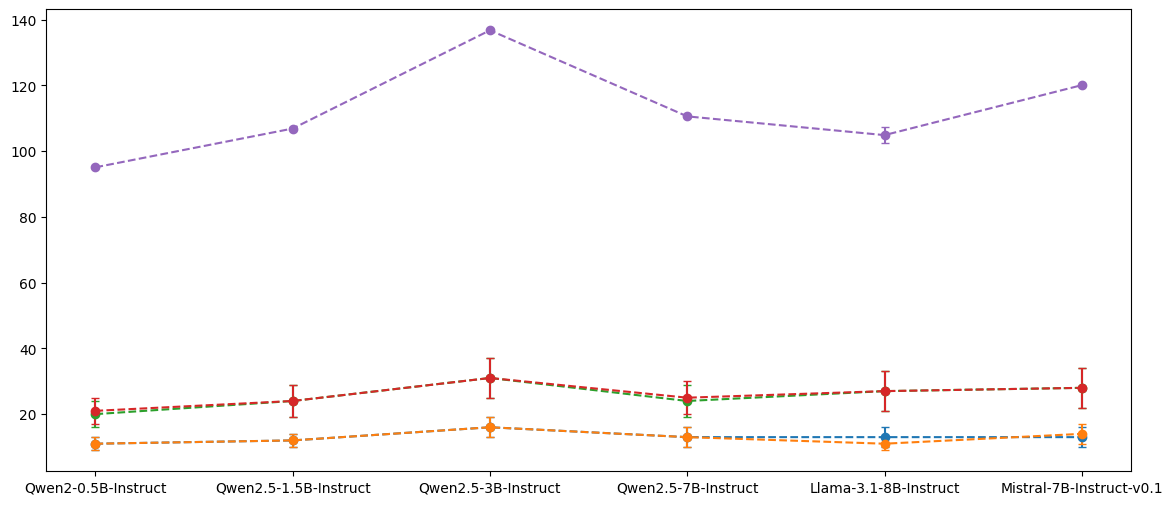

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Raw data
data = [
    ["Baseline", "Qwen2-0.5B-Instruct", "11 ± 2", None, "2.59GB"],
    ["Baseline", "Qwen2.5-1.5B-Instruct", "12 ± 2", None, "4.96GB"],
    ["Baseline", "Qwen2.5-3B-Instruct", "16 ± 3", None, "8.07GB"],
    ["Baseline", "Qwen2.5-7B-Instruct", "13 ± 3", None, "17.23GB"],
    ["Baseline", "Llama-3.1-8B-Instruct", "13 ± 3", None, "18.32GB"],
    ["Baseline", "Mistral-7B-Instruct-v0.1", "13 ± 3", None, "16.73GB"],
    ["Prefix Injection", "Qwen2-0.5B-Instruct", "11 ± 2", None, "2.62GB"],
    ["Prefix Injection", "Qwen2.5-1.5B-Instruct", "12 ± 2", None, "4.95GB"],
    ["Prefix Injection", "Qwen2.5-3B-Instruct", "16 ± 3", None, "8.06GB"],
    ["Prefix Injection", "Qwen2.5-7B-Instruct", "13 ± 3", None, "17.81GB"],
    ["Prefix Injection", "Llama-3.1-8B-Instruct", "11 ± 2", None, "18.97GB"],
    ["Prefix Injection", "Mistral-7B-Instruct-v0.1", "14 ± 3", None, "17.27GB"],
    ["Ablation", "Qwen2-0.5B-Instruct", "20 ± 4", "2:59", "4.62GB"],
    ["Ablation", "Qwen2.5-1.5B-Instruct", "24 ± 5", "4:57", "8.33GB"],
    ["Ablation", "Qwen2.5-3B-Instruct", "31 ± 6", "2:14", "14.65GB"],
    ["Ablation", "Qwen2.5-7B-Instruct", "24 ± 5", "2:17", "32.11GB"],
    ["Ablation", "Llama-3.1-8B-Instruct", "27 ± 6", "4:05", "33.48GB"],
    ["Ablation", "Mistral-7B-Instruct-v0.1", "28 ± 6", "4:07", "30.39GB"],
    ["Ablation + Prefix Injection", "Qwen2-0.5B-Instruct", "21 ± 4", "2:59", "5.96GB"],
    ["Ablation + Prefix Injection", "Qwen2.5-1.5B-Instruct", "24 ± 5", "4:57", "10.60GB"],
    ["Ablation + Prefix Injection", "Qwen2.5-3B-Instruct", "31 ± 6", "2:14", "16.95GB"],
    ["Ablation + Prefix Injection", "Qwen2.5-7B-Instruct", "25 ± 5", "2:17", "32.05GB"],
    ["Ablation + Prefix Injection", "Llama-3.1-8B-Instruct", "27 ± 6", "4:05", "33.49GB"],
    ["Ablation + Prefix Injection", "Mistral-7B-Instruct-v0.1", "28 ± 6", "4:07", "30.39GB"],
    ["Output Aware", "Qwen2-0.5B-Instruct", "95.1 ± 0.1", None, "2.59GB"],
    ["Output Aware", "Qwen2.5-1.5B-Instruct", "106.9 ± 0.5", None, "4.96GB"],
    ["Output Aware", "Qwen2.5-3B-Instruct", "136.8 ± 0.0", None, "8.07GB"],
    ["Output Aware", "Qwen2.5-7B-Instruct", "110.6 ± 0.2", None, "17.23GB"],
    ["Output Aware", "Llama-3.1-8B-Instruct", "104.9 ± 2.4", None, "18.32GB"],
    ["Output Aware", "Mistral-7B-Instruct-v0.1", "120.1 ± 0.1", None, "16.73GB"],
]


# Convert to DataFrame
df = pd.DataFrame(data, columns=["Method", "Model", "Inference Time", "Fitting Time", "Memory"])

# Parse Inference Time and Memory
df["Inference Mean"] = df["Inference Time"].str.extract(r"([\d.]+)").astype(float)
df["Inference Std"] = df["Inference Time"].str.extract(r"± ([\d.]+)").astype(float)
df["Memory (GB)"] = df["Memory"].str.replace("GB", "").astype(float)

# Plot 1: Inference Time per Model (Grouped by Method)
plt.figure(figsize=(14, 6))
for method in df["Method"].unique():
    subset = df[df["Method"] == method]
    plt.errorbar(subset["Model"], subset["Inference Mean"], yerr=subset["Inference Std"], label=method, capsize=3, marker='o', linestyle='--')



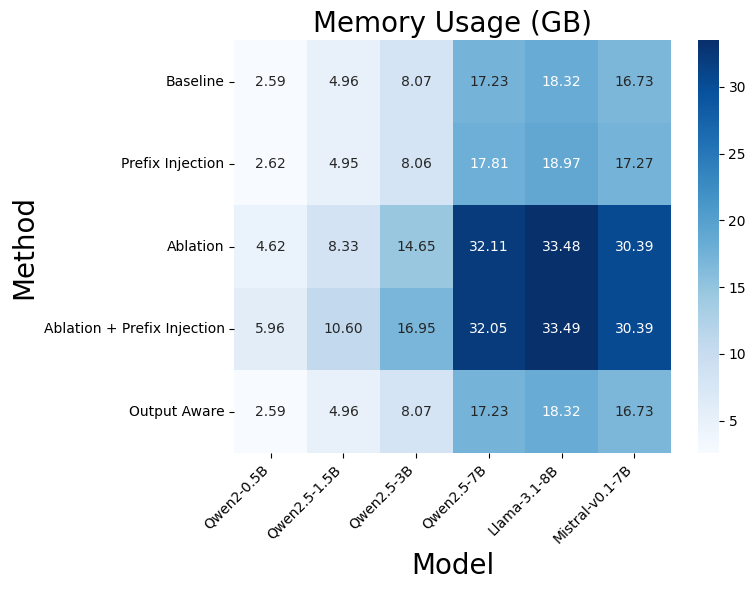

In [40]:
import seaborn as sns
import numpy as np

method_order = [
    "Baseline", "Prefix Injection", "Ablation",
    "Ablation + Prefix Injection", "Output Aware"
]

model_order = [
    "Qwen2-0.5B-Instruct", "Qwen2.5-1.5B-Instruct", "Qwen2.5-3B-Instruct",
    "Qwen2.5-7B-Instruct", "Llama-3.1-8B-Instruct", "Mistral-7B-Instruct-v0.1"
]


model_name_mapping = {
    "Qwen2-0.5B-Instruct": "Qwen2-0.5B",
    "Qwen2.5-1.5B-Instruct": "Qwen2.5-1.5B",
    "Qwen2.5-3B-Instruct": "Qwen2.5-3B",
    "Qwen2.5-7B-Instruct": "Qwen2.5-7B",
    "Llama-3.1-8B-Instruct": "Llama-3.1-8B",
    "Mistral-7B-Instruct-v0.1": "Mistral-v0.1-7B"
}
df["Method"] = pd.Categorical(df["Method"], categories=method_order, ordered=True)

# Apply the mapping to the "Model" column
df["Model"] = df["Model"].replace(model_name_mapping)

# Ensure the new model names are in the correct order
new_model_order = list(model_name_mapping.values())
df["Model"] = pd.Categorical(df["Model"], categories=new_model_order, ordered=True)

# Re-pivot and plot with the new model names
memory_pivot_ordered = df.pivot(index="Method", columns="Model", values="Memory (GB)")

plt.figure(figsize=(8, 6))
sns.heatmap(memory_pivot_ordered, annot=True, fmt=".2f", cmap="Blues")
plt.title("Memory Usage (GB)", fontsize=20)
plt.ylabel("Method", fontsize=20)
plt.xlabel("Model", fontsize=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [41]:
memory_pivot_ordered

Model,Qwen2-0.5B,Qwen2.5-1.5B,Qwen2.5-3B,Qwen2.5-7B,Llama-3.1-8B,Mistral-v0.1-7B
Method,,,,,,
Baseline,2.59,4.96,8.07,17.23,18.32,16.73
Prefix Injection,2.62,4.95,8.06,17.81,18.97,17.27
Ablation,4.62,8.33,14.65,32.11,33.48,30.39
Ablation + Prefix Injection,5.96,10.60,16.95,32.05,33.49,30.39
Output Aware,2.59,4.96,8.07,17.23,18.32,16.73
